output_1.txt
500
output_2.txt
500
output_3.txt
500
output_4.txt
500
output_5.txt
500
output_6.txt
500
output_7.txt
500
output_8.txt
500
output_9.txt
500
output_10.txt
500
output_11.txt
500
output_12.txt
500
output_13.txt
500
output_14.txt
500
output_15.txt
500
output_16.txt
500
output_17.txt
500
output_18.txt
500
output_19.txt
500
output_20.txt
500
output_21.txt
500
output_22.txt
500
output_23.txt
500
output_24.txt
500
output_25.txt
500
output_26.txt
500
output_27.txt
500
output_28.txt
500
output_29.txt
500
output_30.txt
500
output_31.txt
500
output_32.txt
500
output_33.txt
500
output_34.txt
500
output_35.txt
500
output_36.txt
500
output_37.txt
500
output_38.txt
500
output_39.txt
500
0.12780048948822215


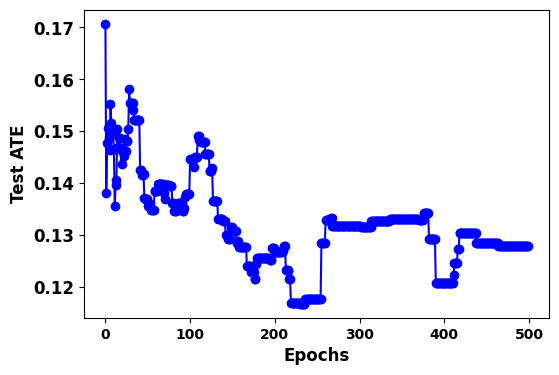

In [5]:
root_dir = "/data2/wuyinjun/causal_tabular/ihdp/seed_0/ours/"
import os
import numpy as np
import matplotlib.pyplot as plt

log_file_ls = ['logs2', 'logs7_2', 'logs5', 'logs7_2', 'logs5', 'logs4', 'logs', 'logs5', 'logs5', 'logs5', 'logs5', 'logs5_2', 'logs5', 'logs9', 'logs5', 'logs', 'logs5_2', 'logs5', 'logs5', 'logs5_2', 'logs5', 'logs', 'logs5', 'logs5', 'logs5', 'logs5', 'logs7', 'logs5', 'logs5', 'logs5', 'logs5', 'logs3', 'logs5', 'logs5', 'logs5', 'logs5', 'logs5', 'logs5', 'logs5']




prefix = "best test ate::"

all_ate_ls = []

# for file in os.listdir(root_dir):
for idx in range(len(log_file_ls)):
    curr_root_dir = os.path.join(root_dir, log_file_ls[idx])
    file = "output_" + str(idx+1) + ".txt"

    if file.endswith(".txt") and file.startswith("output"):
        with open(os.path.join(curr_root_dir, file), "r") as f:
            lines = f.readlines()
        ate_val_ls = []
        for line in lines:
            if line.startswith(prefix):
                ate_val = float(line[len(prefix):].strip())
                ate_val_ls.append(ate_val)
        # print(file)
        if len(ate_val_ls) <= 0:
            continue
        all_ate_ls.append(ate_val_ls)
        print(file)
        print(len(ate_val_ls))

all_ate_ls = np.array(all_ate_ls)

last_val_ls = all_ate_ls[:,-1]
sorted_idx = np.argsort(last_val_ls)
removed_count = max(int(len(sorted_idx)*0.15), 1)
sorted_idx = sorted_idx[0:len(sorted_idx) - removed_count]

all_ate_ls_avg = np.mean(all_ate_ls[sorted_idx], axis=0)
print(all_ate_ls_avg[-1])
time_ls = np.arange(len(all_ate_ls_avg))
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(time_ls, all_ate_ls_avg, marker='o', linestyle='-', color='b', label='Data')


plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Test ATE', fontsize=12, fontweight='bold')

# plt.title('Change of Input Array over Time')

# Show a legend if needed
# plt.legend()

# Show the plot
# plt.show()

ax.yaxis.set_tick_params(labelsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.savefig("training_curve.png")